In [31]:
pip install tensorflow

In [32]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
import pandas as pd

In [33]:
df=pd.read_csv('WA_UseC.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
df.drop('customerID', axis='columns', inplace=True)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [11]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

<ipython-input-12-01816c9a1a9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

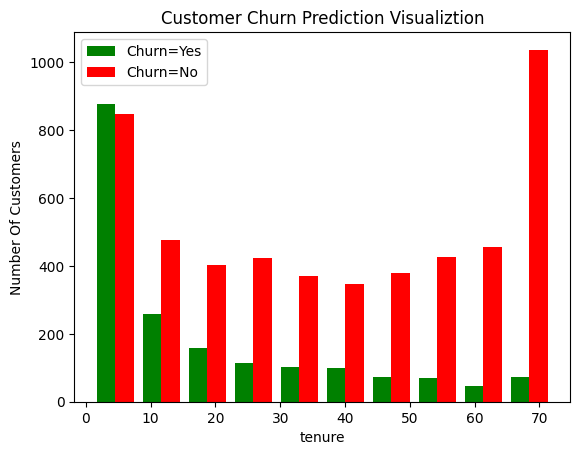

In [15]:
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

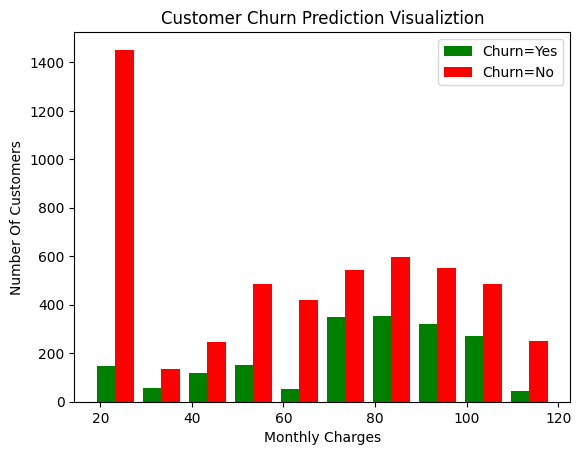

In [16]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [17]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')


print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-18-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-18-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [30]:
print_unique_col_values(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [20]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-20-675e011d9297>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [21]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
df1.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  Female              0        1           0       1             0   
1    Male              0        0           0      34             1   
2    Male              0        0           0       2             1   
3    Male              0        0           0      45             0   
4  Female              0        0           0       2             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0              0             DSL               0             1   
1              0             DSL               1             0   
2              0             DSL               1             1   
3              0             DSL               1             0   
4              0     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   

         Contract  PaperlessBilling              PaymentMethod  \
0  Month-to-month                 1           Electronic check   
1        One year                 0               Mailed check   
2  Month-to-month                 1               Mailed check   
3        One year                 0  Bank transfer (automatic)   
4  Month-to-month                 1           Electronic check   

   MonthlyCharges  TotalCharges  Churn  
0           29.85         29.85      0  
1           56.95       1889.50      0  
2           53.85        108.15      1  
3           42.30       1840.75      0  
4           70.70        151.65      1

In [23]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-23-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [24]:
df1['gender'].unique()

array([1, 0])

In [25]:
df2=pd.get_dummies(df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [34]:
df2.sample(5)

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
267        1              1        0           0  0.253521             1   
3827       1              0        0           0  0.014085             1   
155        1              0        1           1  0.183099             1   
974        1              0        1           1  0.816901             1   
359        0              0        1           1  0.577465             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
267               0               1             1                 0  ...   
3827              0               0             0                 0  ...   
155               0               0             0                 0  ...   
974               0               0             1                 0  ...   
359               1               1             0                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
267                     0                            1                   0   
3827                    0                            0                   1   
155                     0                            1                   0   
974                     1                            0                   0   
359                     0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
267                         1                  0                  0   
3827                        0                  1                  0   
155                         1                  0                  0   
974                         0                  0                  1   
359                         0                  1                  0   

      PaymentMethod_Bank transfer (automatic)  \
267                                         0   
3827                                        0   
155                                         1   
974                                         0   
359                                         0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
267                                       0                               0   
3827                                      0                               0   
155                                       0                               0   
974                                       1                               0   
359                                       0                               1   

      PaymentMethod_Mailed check  
267                            1  
3827                           1  
155                            0  
974                            0  
359                            0  

[5 rows x 27 columns]

In [27]:
for col in df2:
    if df2[col].dtypes=='bool':
        print(f'{col} : {df2[col].unique()}')
        # Replace values in df2, not df1
        df2[col].replace({True:1,False:0},inplace=True)

for col in df2:
      print(f'{col} : {df2[col].unique()}')

InternetService_DSL : [ True False]
InternetService_Fiber optic : [False  True]
InternetService_No : [False  True]
Contract_Month-to-month : [ True False]
Contract_One year : [False  True]
Contract_Two year : [False  True]
PaymentMethod_Bank transfer (automatic) : [False  True]
PaymentMethod_Credit card (automatic) : [False  True]
PaymentMethod_Electronic check : [ True False]
PaymentMethod_Mailed check : [False  True]
gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [

In [35]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [29]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [36]:
df2.sample(5)

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
7          1              0        0           0  0.126761             0   
5142       1              0        0           0  0.915493             1   
4195       1              1        0           0  0.619718             1   
441        1              1        0           0  0.676056             1   
5765       1              1        1           0  0.943662             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
7                 0               1             0                 0  ...   
5142              1               1             1                 1  ...   
4195              1               1             0                 0  ...   
441               1               1             0                 0  ...   
5765              1               1             1                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
7                       1                            0                   0   
5142                    0                            1                   0   
4195                    1                            0                   0   
441                     0                            1                   0   
5765                    0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
7                           1                  0                  0   
5142                        0                  1                  0   
4195                        1                  0                  0   
441                         1                  0                  0   
5765                        0                  1                  0   

      PaymentMethod_Bank transfer (automatic)  \
7                                           0   
5142                                        1   
4195                                        0   
441                                         0   
5765                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
7                                         0                               0   
5142                                      0                               0   
4195                                      0                               1   
441                                       1                               0   
5765                                      1                               0   

      PaymentMethod_Mailed check  
7                              1  
5142                           0  
4195                           0  
441                            0  
5765                           0  

[5 rows x 27 columns]

In [37]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [53]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    # keras.layers.Dense(15,activation='relu'),
    # keras.layers.Dense(10,activation='relu'),
    # keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200)

Epoch 1/200
176/176 [==============================] - 1s 2ms/step - loss: 0.5431 - accuracy: 0.7028
Epoch 2/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.7897
Epoch 3/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.7959
Epoch 4/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7995
Epoch 5/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8020
Epoch 6/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8018
Epoch 7/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8059
Epoch 8/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8052
Epoch 9/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8043
Epoch 10/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accura

In [54]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7804


[0.4625273644924164, 0.7803837656974792]

In [55]:
yp=model.predict(x_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.2568213 ],
       [0.56720066],
       [0.0244096 ],
       [0.754847  ],
       [0.41131988]], dtype=float32)

In [56]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [57]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [58]:
y_pred[:5]

[0, 1, 0, 1, 0]

In [59]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.65      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(45.722222222222214, 0.5, 'Truth')

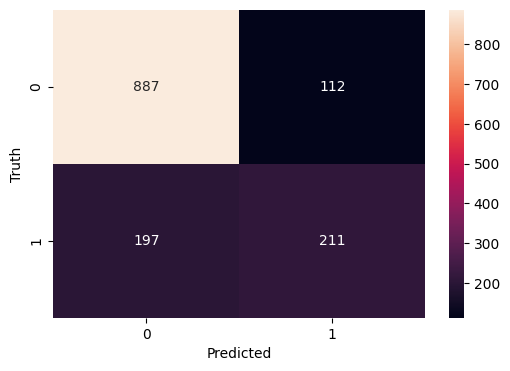

In [60]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(6,4))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')